In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder_dataset = 'drive/MyDrive/dataxray/'
main_directory = 'drive/MyDrive/'
target_class = ['COVID', 'Normal', 'Pneumonia']

In [4]:
import os, glob
from keras.preprocessing import image
import cv2
import numpy as np

data = []
yl = []
label = 0
for classname in target_class:
    count = 0
    for img in glob.glob(folder_dataset + classname + '/*')[:15]:
        im = cv2.imread(img)
        im = cv2.resize(im,(240,240))
        im = (im/225)
        data.append(im)
        yl.append(label)
        count += 1
    label += 1
    print("Jumlah "+str(classname)+" : "+str(count))

Jumlah COVID : 15
Jumlah Normal : 15
Jumlah Pneumonia : 15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0.98, 'gambar normalisasi')

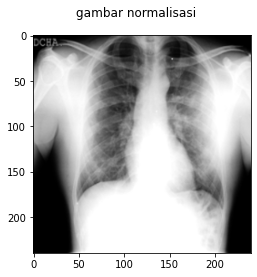

In [11]:
import matplotlib.pyplot as plt
plt.imshow(data[4])
plt.suptitle("gambar normalisasi")

In [ ]:
import os, glob
from keras.preprocessing import image
import cv2
import numpy as np

X = []
y = []
label = 0
for classname in target_class:
    count = 0
    for img in glob.glob(folder_dataset + classname + '/*')[:1500]:
        im = cv2.imread(img)
        im = cv2.resize(im,(240,240))
        im = (im - np.mean(im)) / np.std(im)
        im = ((im - np.min(im)) / (np.max(im) - np.min(im)))
        X.append(im)
        y.append(label)
        count += 1
    label += 1
    print("Jumlah "+str(classname)+" : "+str(count))

Jumlah COVID : 1500
Jumlah Normal : 1500
Jumlah Pneumonia : 1345


Text(0.5, 0.98, 'gambar normalisasi')

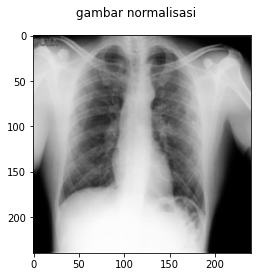

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1])
plt.suptitle("gambar normalisasi")

In [ ]:
import numpy as np

X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)


(4345, 240, 240, 3)
(4345,)


In [ ]:
np.save('drive/MyDrive/data_x.npy', X)
np.save('drive/MyDrive/data_y.npy', y)

In [ ]:
from sklearn.model_selection import StratifiedKFold
import os
from tensorflow.keras.utils import to_categorical

yc = to_categorical(y, 3)

kfold = StratifiedKFold(n_splits=5, shuffle=True)
for fold_no, (train, test) in enumerate(kfold.split(X, y)):
  fold_no += 1
  if not os.path.isdir(f'{main_directory}/Fold-{fold_no}/'):
    os.mkdir(f'{main_directory}/Fold-{fold_no}/')
  print(f"Fold {fold_no}")
  print("Train", len(y[train]))
  print("Test", len(yc[test]))
  #Training Data
  np.save(f'{main_directory}/Fold-{fold_no}/data-train-x-{fold_no}.npy', X[train])
  np.save(f'{main_directory}/Fold-{fold_no}/data-train-y-{fold_no}.npy', yc[train])
  #Testing Data
  np.save(f'{main_directory}/Fold-{fold_no}/data-test-x-{fold_no}.npy', X[test])
  np.save(f'{main_directory}/Fold-{fold_no}/data-test-y-{fold_no}.npy', yc[test])
print('Proses k-fold selesai')

Fold 1
Train 3476
Test 869
Fold 2
Train 3476
Test 869
Fold 3
Train 3476
Test 869
Fold 4
Train 3476
Test 869
Fold 5
Train 3476
Test 869
Proses k-fold selesai


In [ ]:
print(yc.shape)

(4345, 3)


In [ ]:
import numpy as np
import tensorflow as tf


src = "drive/MyDrive/"
x = np.load(src+"Fold-1/data-train-x-1.npy")
y = np.load(src+"Fold-1/data-train-y-1.npy")


In [ ]:
!ls "/content/drive/MyDrive"

'Colab Notebooks'   dataxray	 Fold-1   Fold-3   Fold-5
 data_x.npy	    data_y.npy	 Fold-2   Fold-4
